In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=42)
print(X.shape,y.shape)

(500, 2) (500,)


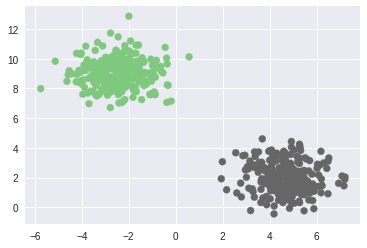

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

### Perceptron Implementation

In [4]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def predict(X,weights):
  z = np.dot(X,weights)
  pred = sigmoid(z)
  return pred

def loss(X,y,weights):
  ycap = predict(X,weights)
  err = -1*np.mean(y*np.log(ycap)+(1-y)*np.log(1-ycap))
  return err

def update(X,y,weights,eta):
  m = X.shape[0]
  ycap = predict(X,weights)
  dw = (np.dot(X.T,ycap-y))/m
  weights = weights - eta*dw
  return weights


def train(X,y,eta=0.1,epochs=100):
  ones = np.ones((X.shape[0],1))
  newX = np.append(ones,X,axis=1)
  weights = np.zeros((newX.shape[1],))
  err = []
  for i in range(epochs):
    l = loss(newX,y,weights)
    err.append(l)
    weights = update(newX,y,weights,eta)
  return weights,err

def getPredictions(X,weights,labels=True):
  if X.shape[1] != weights.shape[0]:
    ones = np.ones((X.shape[0],1))
    X = np.append(ones,X,axis=1)
  
  preds = predict(X,weights)

  if labels:
    labels = np.zeros(preds.shape)
    labels[preds>=0.5] = 1
    return labels
  else:
    return preds

In [5]:
weights,err = train(X,y,eta=0.5)
print(weights)

[ 0.20719978  1.74380175 -0.47865906]


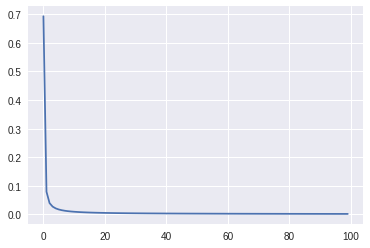

In [6]:
plt.plot(err)
plt.show()

In [22]:
x1 = np.linspace(-1,3,10)
x2 = -1*(weights[0]+weights[1]*x1)/weights[2]

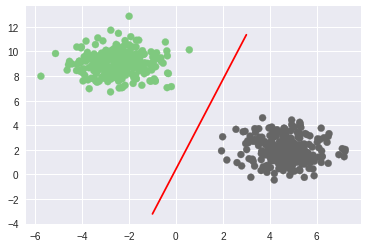

In [23]:
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.plot(x1,x2,color='red')
plt.show()